In [214]:
import numpy as np
import imageio
import scipy as sio
import os
import pandas as pd
from scipy import ndimage

In [215]:
#%%
from mlxtend.data import loadlocal_mnist
import platform

if not platform.system() == 'Windows':
    X_data, Y_label = loadlocal_mnist(
            images_path='MNIST/train-images-idx3-ubyte',
            labels_path='MNIST/train-labels-idx1-ubyte')

else:
    X_data, Y_label = loadlocal_mnist(
            images_path='MNIST/train-images.idx3-ubyte',
            labels_path='MNIST/train-labels.idx1-ubyte')

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

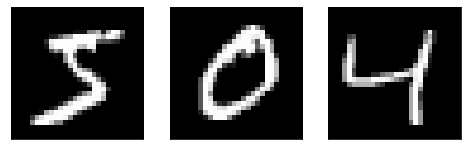

In [216]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(28,28))
X_data = X_data.astype('float32')
for i in range(i+1):
    plt.subplot(1,10,i+1)
    plt.imshow(X_data[i].reshape(28,28), cmap='gray', interpolation='nearest')
    print(X_data[i])
    plt.xticks([])
    plt.yticks([])
#%%

## MNIST Dataset Radon Transformation

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0.

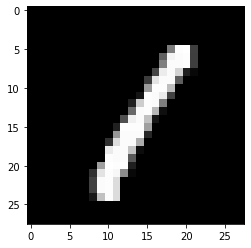

In [217]:
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, iradon
from scipy.ndimage import zoom
from numpy import asarray

from skimage.filters import threshold_mean

X_data = X_data.astype('float32')
P_NAngle=4

for i in range(4):
    P_Angle=0
    #plt.subplot(1,10,i+1)
    RBC=np.array([])
    while P_Angle <180:
        data=np.array([])
        plt.imshow(X_data[i].reshape(28,28), cmap='gray', interpolation='nearest')
        Th_P=radon(X_data[i].reshape(28,28),theta=[P_Angle])
        P_Angle=P_Angle+(180/P_NAngle)
        #print(Th_P)
    #Creating Threshold Values
        thresh = threshold_mean(Th_P)
        binary = Th_P >= thresh
        data = np.asarray(binary)
        RBC=np.append(RBC,data)
        #print(binary)
    print(RBC)
        #RBC=np.expand_dims(RBC,axis=0)
        #plt.imshow(RBC, cmap='gray',interpolation='nearest')
        #plt.show()

#%%

## Testing and Screenshots

In [221]:
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, iradon
from skimage.transform import resize
from scipy.ndimage import zoom
from numpy import asarray

from skimage.filters import threshold_mean

X_data = X_data.astype('float32')

P_NAngle=4
Downsampling=28

df=pd.DataFrame([])

for i in range(9):
    P_Angle=0
    RBC=np.array([])
    while P_Angle <180:
        data=np.array([])
        Th_P=radon(X_data[i].reshape(Downsampling,Downsampling),theta=[P_Angle])
    #Creating Threshold Values
        thresh = threshold_mean(Th_P)
        binary = Th_P >= thresh
        data = np.asarray(binary)
        RBC=np.append(RBC,data)
        P_Angle=P_Angle+(180/P_NAngle)
        RBC=np.expand_dims(RBC,axis=0)
    new_row={'Labels':Y_label[i],'Barcodes':RBC}
    df=df.append(new_row,ignore_index=True)
    df.to_excel('BarcodeDataset.xlsx')
    #plt.axis('off')
    #plt.imshow(RBC, cmap='gray',interpolation='nearest')
    #print(RBC)
    #plt.savefig('test1.jpg',bbox_inches='tight',pad_inches=0)
print ("done")
#%%

done
